         Date     Price  Volume  Price change  Volume change
0  2024-04-04  2,449.00     0.0          0.82            NaN
1  2024-04-03  2,429.00     0.0          2.06            NaN


/var/folders/gk/lwvxlf616ggf8j4h0y1hjl6c0000gn/T/ipykernel_99837/1671314584.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return_df = return_df.merge(brent[['Date', 'Price change']], on='Date', how='left', suffixes=('_brent'))
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Note: you may need to restart the kernel to use updated packages.
         Date     Price  Volume  Price change  Volume change
0  2024-04-04  2,449.00     0.0          0.82            NaN
1  2024-04-03  2,429.00     0.0          2.06            NaN
Date                      0
Price change              0
Price change_cofee        0
Price change_copper       0
Price change_corn         0
Price change_cotton       0
Price change_gasoline     0
Price change_gold         0
Price change_nickel       0
Price change_palladium    0
Price change_silver       0
Price change_soybean      0
Price change_wheat        0
Price change_wti          0
Price change_zinc         0
Price change_cocoa        0
dtype: int64
Date             0
brent_log        0
cocoa_log        0
cofee_log        0
copper_log       0
corn_log         0
cotton_log       0
gasoline_log     0
gold_log         0
nickel_log       0
palladium_log    0
silver_log       0
soybean_log      0
wheat_log        0
wti_log          0
zinc_

/var/folders/gk/lwvxlf616ggf8j4h0y1hjl6c0000gn/T/ipykernel_99837/1671314584.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return_df = return_df.merge(brent[['Date', 'Price change']], on='Date', how='left', suffixes=('_brent'))
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Fitting GJR-GARCH model for brent_log
Best parameters for brent_log: p=1, o=1, q=1
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                    brent_log   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -7980.37
Distribution:      Standardized Student's t   AIC:                           15972.7
Method:                  Maximum Likelihood   BIC:                           16010.3
                                              No. Observations:                 3864
Date:                      Thu, Apr 25 2024   Df Residuals:                     3863
Time:                              08:58:45   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best parameters for cocoa_log: p=1, o=0, q=1
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    cocoa_log   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7530.89
Distribution:      Standardized Student's t   AIC:                           15071.8
Method:                  Maximum Likelihood   BIC:                           15103.1
                                              No. Observations:                 3864
Date:                      Thu, Apr 25 2024   Df Residuals:                     3863
Time:                              08:59:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

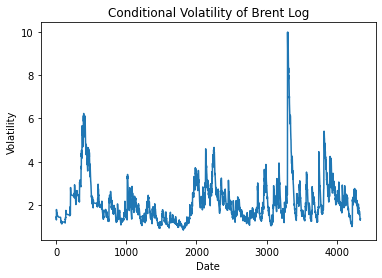

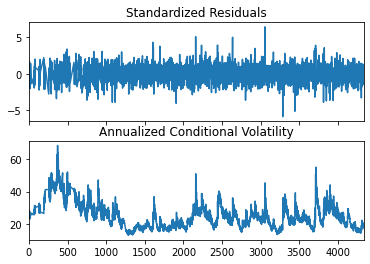

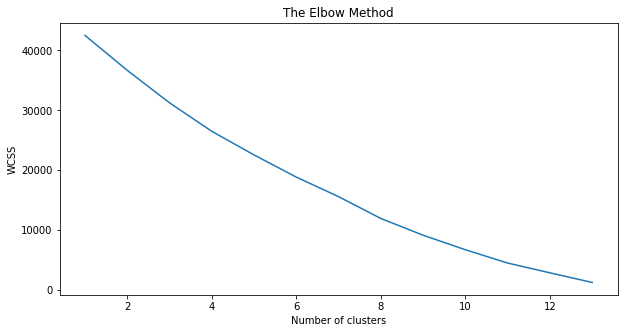

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


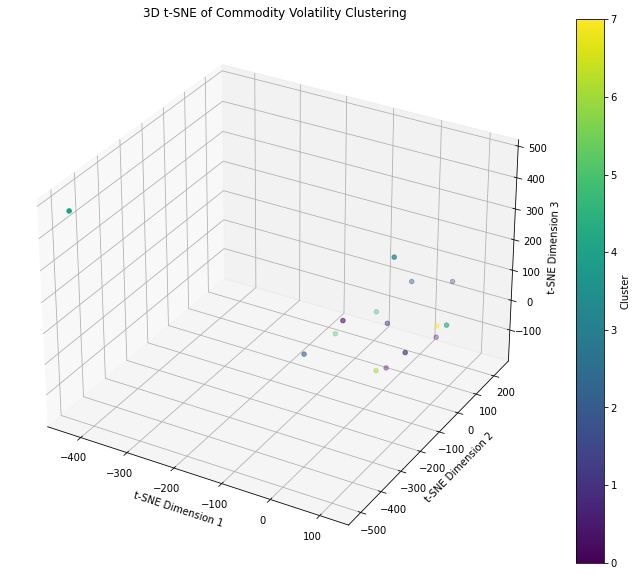

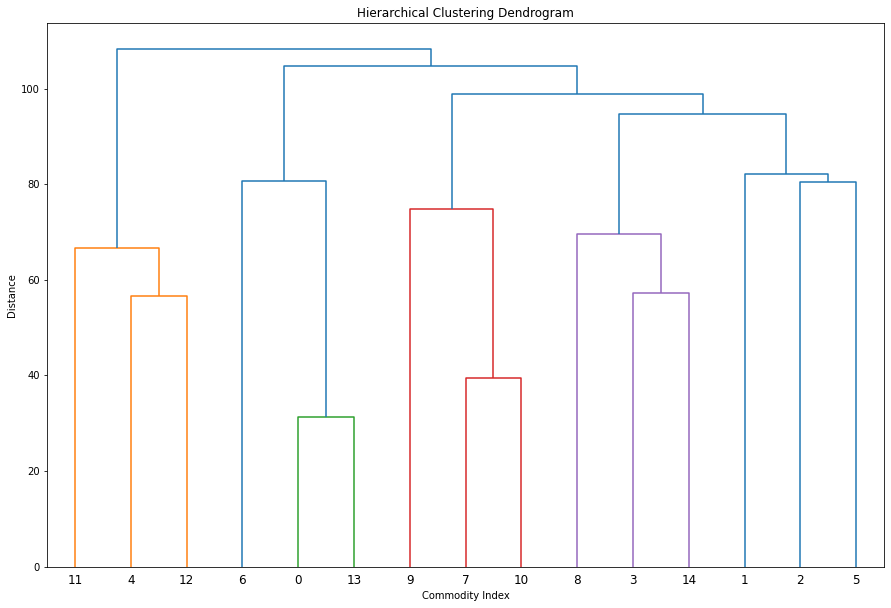

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


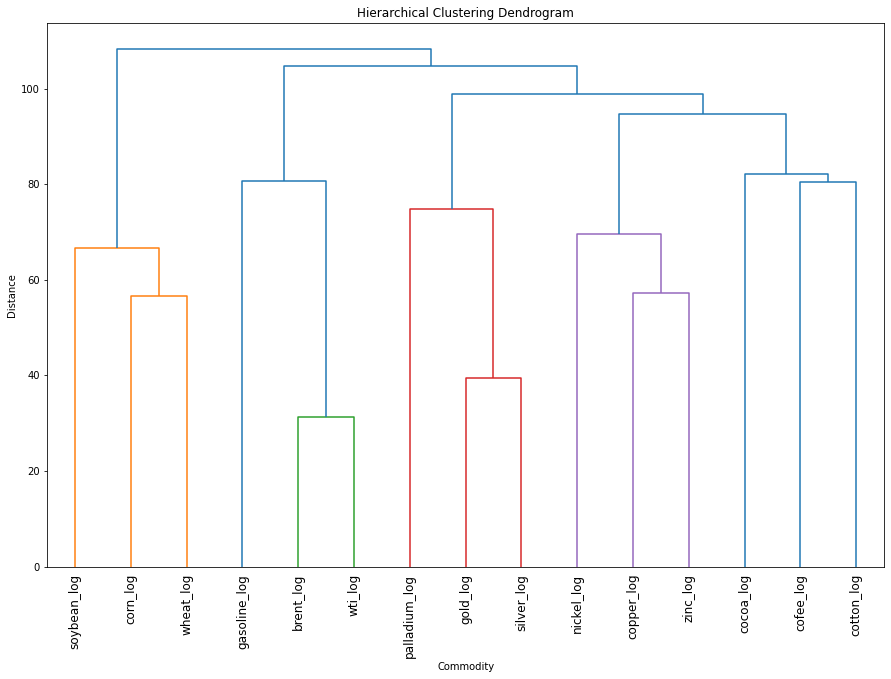

In [2]:
%run "/Users/nickarhi/Desktop/Studying/Project HSE 4th course/Codes/Return_clustering.ipynb"

In [3]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
return_log_scaled_cl = return_log_scaled_cl.T


return_list = [np.array(return_log_scaled_cl.iloc[i]) for i in range(len(return_log_scaled_cl))]

distance_matrix = dtw.distance_matrix(return_list, use_c=False)

df_distance_matrix = pd.DataFrame(distance_matrix, index=(return_log_scaled_cl.T).columns, columns=(return_log_scaled_cl.T).columns)

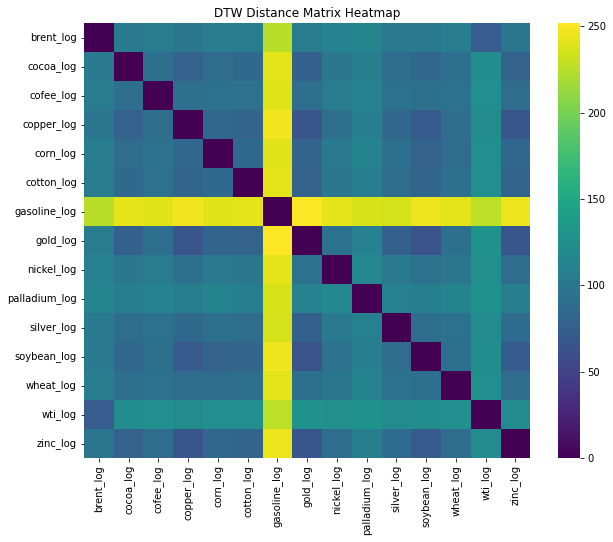

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_distance_matrix, annot=False, cmap='viridis')
plt.title('DTW Distance Matrix Heatmap')
plt.show()

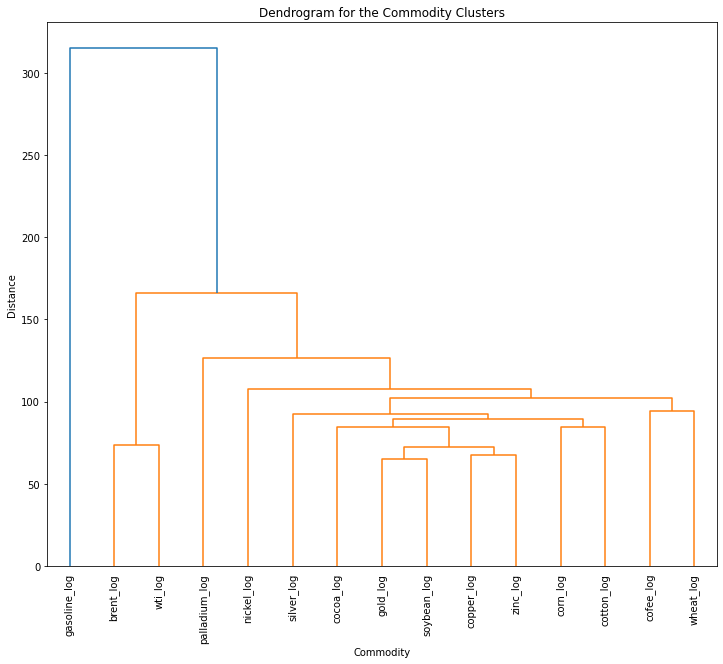

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform


Z = linkage(squareform(distance_matrix), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 10))
dendrogram(Z, labels=(return_log_scaled_cl.T).columns, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for the Commodity Clusters")
plt.xlabel('Commodity')
plt.ylabel('Distance')
plt.show()


max_d = 8  
clusters = fcluster(Z, max_d, criterion='distance')


return_log_scaled_cl['Cluster'] = clusters


In [17]:
from scipy.cluster.hierarchy import fcluster

def form_clusters(linked, num_clusters=None, criterion='maxclust'):
    # Cut the dendrogram to form flat clusters
    clusters = fcluster(linked, t=num_clusters, criterion=criterion)
    return clusters

return_clusters = form_clusters(Z, num_clusters=4)

In [18]:
from sklearn.metrics import silhouette_score
data_df = return_log_scaled_cl.drop('Cluster', axis = 1)
score = silhouette_score(data_df, return_clusters)
score

0.18009892938512068